In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np 
import os
for dirname, _, filenames in os.walk('/content/drive/My Drive/A_Z Handwritten Data.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [0]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten
import tensorflow.keras as ks
%matplotlib inline

In [0]:
from sklearn.utils import shuffle
from tensorflow.keras.utils import to_categorical
#for data extraxtion and preprocessing
def Extract(file,splitFact):
    print("Beginning the extraction process...")
    with open(file,'r') as f:
        data = f.read()
        data = data.split('\n')
    
    x_train = []
    y_train = []
    x_test = []
    y_test = []
    
    data = shuffle(data)
    
    l = len(data)
    
    trainData = int(l * (1-splitFact))
    testData = int(l - trainData)
    
    print("Dividing data into {} training and {} testing samples..".format(trainData,testData))
    
    for i in range(trainData):
        if data[i] != '':
            x_train.append(np.array(data[i].split(',')[1:], dtype=np.float32))
            y_train.append(np.array(data[i].split(',')[0], dtype=np.int8))

    for i in range(testData):
        if data[i+trainData] != '':
            x_test.append(np.array(data[i+trainData].split(',')[1:], dtype=np.float32))
            y_test.append(np.array(data[i+trainData].split(',')[0], dtype=np.int8))
            
    x_train = np.array(x_train)/255
    y_train = to_categorical(np.array(y_train))
    x_test = np.array(x_test)/255
    y_test = to_categorical(np.array(y_test))
    
    del data
    
    return (x_train,y_train),(x_test,y_test)

In [0]:
#Extracting data
(x_train,y_train),(x_test,y_test) = Extract('/content/drive/My Drive/A_Z Handwritten Data.csv',0.2)

x_train = x_train.reshape(len(x_train),28,28,1)
x_test = x_test.reshape(len(x_test),28,28,1)

Beginning the extraction process...
Dividing data into 297961 training and 74491 testing samples..


In [0]:
labels=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']

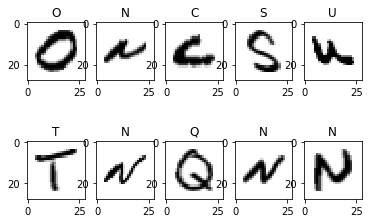

In [0]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[i].reshape(28,28),cmap='binary')
    plt.title(labels[np.argmax(y_test[i])])

In [0]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(28, 28, 1), name='conv1'))
model.add(MaxPool2D(pool_size=(2, 2,),name='pool1'))
model.add(Dropout(0.2,name='dropout1'))
model.add(Conv2D(filters=32, kernel_size=2, strides=1, padding='same', activation='relu',name='conv2'))
model.add(MaxPool2D(pool_size=(2, 2),name='pool2'))
model.add(Flatten(name='flat'))
model.add(Dropout(0.1,name='dropout2'))
model.add(Dense(128,activation='relu',name='dense'))
model.add(Dense(26,activation='softmax',name='res'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 28, 28, 16)        416       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 14, 14, 16)        0         
_________________________________________________________________
dropout1 (Dropout)           (None, 14, 14, 16)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 14, 14, 32)        2080      
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 7, 7, 32)          0         
_________________________________________________________________
flat (Flatten)               (None, 1568)              0         
_________________________________________________________________
dropout2 (Dropout)           (None, 1568)             

In [0]:
checkpoint = ks.callbacks.ModelCheckpoint('model.h5',save_best_only=True)
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
#training..
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=20, batch_size=1024, callbacks=[checkpoint], verbose=1)
#history = model.fit(x_train,y_train,epochs = 20 ,validation_data=(x_test,y_test) )


Train on 297960 samples, validate on 74491 samples
Epoch 1/20
297960/297960 [==============================] - 5s 18us/sample - loss: 0.6195 - acc: 0.8262 - val_loss: 0.1826 - val_acc: 0.9508
Epoch 2/20
297960/297960 [==============================] - 5s 17us/sample - loss: 0.1670 - acc: 0.9529 - val_loss: 0.1126 - val_acc: 0.9693
Epoch 3/20
297960/297960 [==============================] - 5s 17us/sample - loss: 0.1223 - acc: 0.9655 - val_loss: 0.0898 - val_acc: 0.9756
Epoch 4/20
297960/297960 [==============================] - 5s 17us/sample - loss: 0.1025 - acc: 0.9713 - val_loss: 0.0797 - val_acc: 0.9785
Epoch 5/20
297960/297960 [==============================] - 5s 17us/sample - loss: 0.0895 - acc: 0.9746 - val_loss: 0.0727 - val_acc: 0.9797
Epoch 6/20
297960/297960 [==============================] - 5s 17us/sample - loss: 0.0811 - acc: 0.9772 - val_loss: 0.0662 - val_acc: 0.9815
Epoch 7/20
297960/297960 [==============================] - 5s 17us/sample - loss: 0.0736 - acc: 0.9790

In [0]:
predictions = model.predict([x_test])

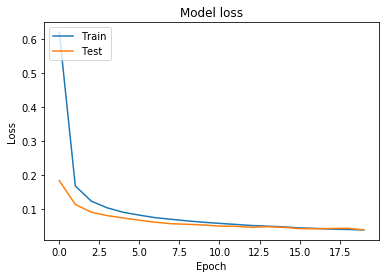

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

In [0]:
print("Probability for each digit ('A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z')")
predictions[15]

Probability for each digit (A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z)


array([1.35649547e-17, 1.01427804e-13, 4.88655936e-13, 6.48597442e-09,
       5.80279360e-15, 3.83712506e-11, 2.01339726e-12, 3.84662744e-12,
       1.10873415e-07, 4.49272120e-05, 2.16345900e-11, 7.59482700e-13,
       3.79701153e-14, 1.24562476e-08, 2.98487990e-08, 4.48979465e-11,
       3.18656742e-14, 5.88023147e-14, 2.36165319e-12, 9.99954820e-01,
       1.02042002e-08, 1.34124318e-11, 9.21696497e-10, 4.44445203e-10,
       1.19164170e-07, 2.52556851e-12], dtype=float32)

In [0]:
print(np.argmax(predictions[15]))

19


In [0]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

74491/74491 [==============================] - 5s 65us/sample - loss: 0.0379 - acc: 0.9892
0.037887676574984534 0.9892336


In [0]:

predicted = model.predict(x_test[i+5].reshape(1,28,28,1))

In [0]:
print(predicted)

[[2.00456340e-15 3.28632055e-16 1.46369801e-14 7.30048869e-11
  3.90798437e-14 4.88411438e-12 1.02511216e-16 4.37172520e-12
  2.15108875e-10 4.14109263e-06 1.26317427e-13 4.94979491e-14
  1.02717863e-13 2.84335133e-09 1.22891253e-09 1.07572996e-11
  7.91382594e-21 1.36242783e-15 5.60963548e-13 9.99995589e-01
  4.96741259e-11 2.29845288e-12 2.09137655e-12 1.69798106e-10
  2.46453226e-07 8.90047966e-11]]


In [0]:
model = ks.models.load_model('model.h5')
acc = model.evaluate(x_test,y_test)
print(f"Final test loss : {acc[0]}, final test accuracy : {acc[1]}")

74491/74491 [==============================] - 5s 65us/sample - loss: 0.0379 - acc: 0.9892
Final test loss : 0.037887676574984534, final test accuracy : 0.9892336130142212


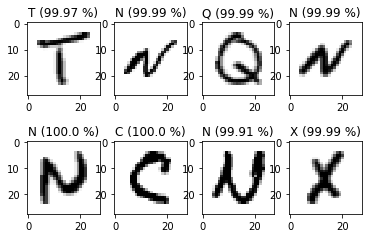

In [0]:
#predicting
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(x_test[i+5].reshape(28,28),cmap='binary')
    prob = model.predict(x_test[i+5].reshape(1,28,28,1))
    pred = int(np.argmax(prob, axis=1))
    response = labels[pred] +" (" + str(round(prob[0][pred] * 100,2)) + " %)"
    plt.title(response)